<a href="https://colab.research.google.com/github/alpet25/twofive-twentyfive/blob/main/PYIM_Assign_2_PYIM009ONL005_Alfapetra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cp "/content/drive/MyDrive/Colab Notebooks/dataset/cats_and_dogs_filtered.zip" ".\"

/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [2]:
!unzip "/content/drive/MyDrive/Colab Notebooks/dataset/cats_and_dogs_filtered.zip"

Streaming output truncated to the last 5000 lines.
  inflating: cats_and_dogs_filtered/train/dogs/dog.496.jpg  
  inflating: __MACOSX/cats_and_dogs_filtered/train/dogs/._dog.496.jpg  
  inflating: cats_and_dogs_filtered/train/dogs/dog.125.jpg  
  inflating: __MACOSX/cats_and_dogs_filtered/train/dogs/._dog.125.jpg  
  inflating: cats_and_dogs_filtered/train/dogs/dog.8.jpg  
  inflating: __MACOSX/cats_and_dogs_filtered/train/dogs/._dog.8.jpg  
  inflating: cats_and_dogs_filtered/train/dogs/dog.48.jpg  
  inflating: __MACOSX/cats_and_dogs_filtered/train/dogs/._dog.48.jpg  
  inflating: cats_and_dogs_filtered/train/dogs/dog.643.jpg  
  inflating: __MACOSX/cats_and_dogs_filtered/train/dogs/._dog.643.jpg  
  inflating: cats_and_dogs_filtered/train/dogs/dog.657.jpg  
  inflating: __MACOSX/cats_and_dogs_filtered/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs_filtered/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs_filtered/train/dogs/._dog.131.jpg  
  inflating: cats_and_do

In [3]:
train_folder = "/content/cats_and_dogs_filtered/train"
val_folder = "/content/cats_and_dogs_filtered/validation"

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

import pathlib

In [5]:
data_dir = pathlib.Path(train_folder)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2000


In [6]:
data_dir_val = pathlib.Path(val_folder)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2000


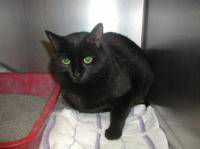

In [7]:
cats = list(data_dir.glob('cats/*'))
PIL.Image.open(str(cats[1]))

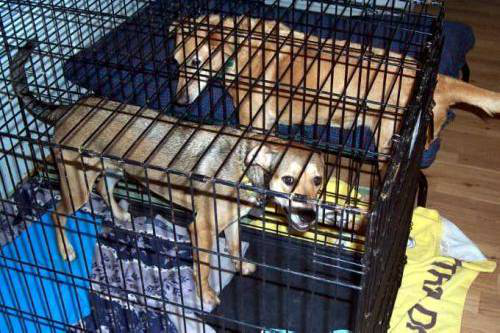

In [8]:
dogs = list(data_dir.glob('dogs/*'))
PIL.Image.open(str(dogs[1]))

In [9]:
#define size image
IMG_WIDTH = 180
IMG_HEIGHT = 180
batch_size = 5

In [10]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_folder,
    shuffle=True,
    batch_size=batch_size,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
)

Found 2000 files belonging to 2 classes.


In [11]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_folder,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
)

Found 1000 files belonging to 2 classes.


In [33]:
class_names = train_dataset.class_names
print(class_names)

['cats', 'dogs']


In [13]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  break
print('batch, height, widht, rgb')

(5, 180, 180, 3)
batch, height, widht, rgb


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [16]:
normalized_dataset = train_dataset.map(lambda x, y : (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch

print(np.min(first_image), np.max(first_image))


0.0 1.0


In [17]:
num_classes = 2
model = Sequential([
                    layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

In [20]:
epochs = 50
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=epochs
                    )

Epoch 1/50
400/400 [==============================] - 37s 16ms/step - loss: 5.1017 - accuracy: 0.5310 - val_loss: 0.7025 - val_accuracy: 0.5300
Epoch 2/50
400/400 [==============================] - 6s 16ms/step - loss: 0.6237 - accuracy: 0.6355 - val_loss: 0.7873 - val_accuracy: 0.5450
Epoch 3/50
400/400 [==============================] - 6s 16ms/step - loss: 0.5280 - accuracy: 0.7240 - val_loss: 0.8565 - val_accuracy: 0.5220
Epoch 4/50
400/400 [==============================] - 6s 16ms/step - loss: 0.5029 - accuracy: 0.7500 - val_loss: 1.2055 - val_accuracy: 0.5430
Epoch 5/50
400/400 [==============================] - 6s 16ms/step - loss: 0.4416 - accuracy: 0.7815 - val_loss: 1.1827 - val_accuracy: 0.5420
Epoch 6/50
400/400 [==============================] - 6s 16ms/step - loss: 0.5310 - accuracy: 0.8030 - val_loss: 1.7514 - val_accuracy: 0.5090
Epoch 7/50
400/400 [==============================] - 6s 16ms/step - loss: 0.5230 - accuracy: 0.7340 - val_loss: 1.7477 - val_accuracy: 0.550

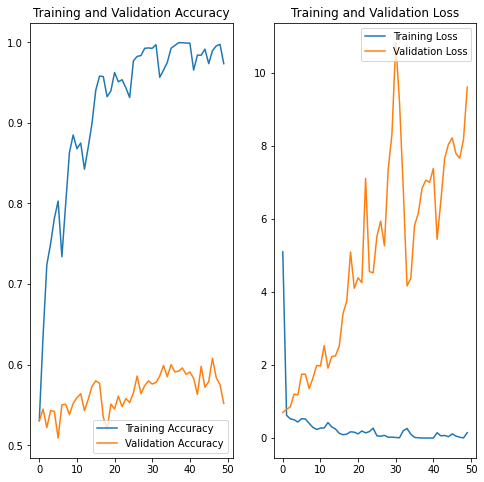

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

With Data Augmentation

In [22]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

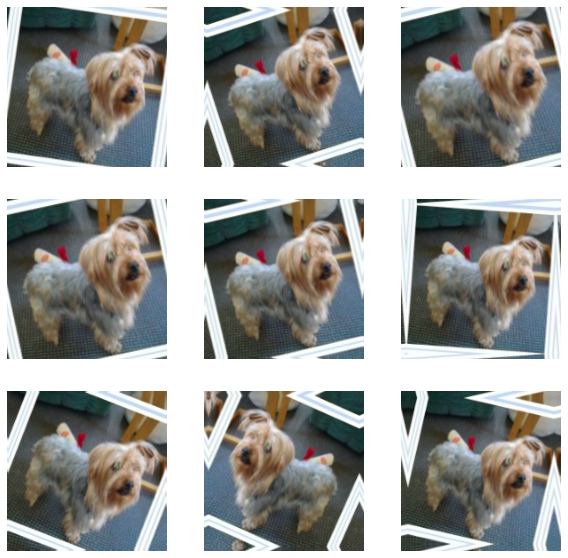

In [23]:
for image, _ in train_dataset.take(1) :
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')


In [24]:
num_classes = 2
model_aug = Sequential([
                    data_augmentation,
                    layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

In [25]:
model_aug.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
input_2 (InputLayer)         multiple                  0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [26]:
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
epochs = 150
history_aug = model_aug.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=epochs
                    )

Epoch 1/150
400/400 [==============================] - 9s 20ms/step - loss: 3.2446 - accuracy: 0.5135 - val_loss: 0.6862 - val_accuracy: 0.5290
Epoch 2/150
400/400 [==============================] - 8s 21ms/step - loss: 0.6895 - accuracy: 0.5480 - val_loss: 0.6965 - val_accuracy: 0.5160
Epoch 3/150
400/400 [==============================] - 8s 19ms/step - loss: 0.7006 - accuracy: 0.5305 - val_loss: 0.6972 - val_accuracy: 0.5060
Epoch 4/150
400/400 [==============================] - 8s 20ms/step - loss: 0.6995 - accuracy: 0.5030 - val_loss: 0.6936 - val_accuracy: 0.5010
Epoch 5/150
400/400 [==============================] - 8s 20ms/step - loss: 0.6967 - accuracy: 0.5125 - val_loss: 0.6934 - val_accuracy: 0.5020
Epoch 6/150
400/400 [==============================] - 8s 19ms/step - loss: 0.6950 - accuracy: 0.5025 - val_loss: 0.6940 - val_accuracy: 0.5120
Epoch 7/150
400/400 [==============================] - 8s 20ms/step - loss: 0.6969 - accuracy: 0.5115 - val_loss: 0.7067 - val_accuracy:

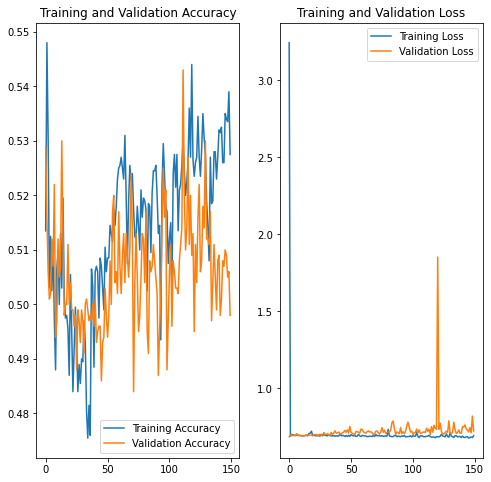

In [28]:
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']

loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

prediction

In [61]:
#Prediction
test_image = "/content/drive/MyDrive/Colab Notebooks/test_catdog/dog/dog3.jpg"

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

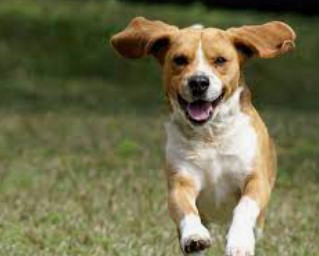

In [62]:
PIL.Image.open(test_image)

In [63]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to dogs with a 99.88 percent confidence.


In [64]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_aug.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to cats with a 50.44 percent confidence.


In [69]:
model.save("model_catdog", save_format="h5")
model_aug.save("model_aug_catdog.h5")